# Loading data

In [1]:
# from google.colab import drive
# drive.mount("/content/drive/")

In [2]:
import pandas as pd
wp = pd.read_csv('../weighted.csv', encoding="utf-8")
wp.drop('Unnamed: 0', inplace=True, axis=1)
wp

,VERSE1,VERSE2,PROSODY,PROSODY_ID
0,‏ آتش آهم ز بس گلزار بی نم می شود,برگ گل سنگ ته دندان شبنم می شود,فاعلاتن فاعلاتن فاعلاتن فاعلن,12
1,‏ بهیچوجه نیارم برید ازو که مرا,به دل محبت او چون صفاست با گوهر,مفاعلن فعلاتن مفاعلن فعلن,92
2,‏ بی تکلف ز شکر ریزی صائب جویا,طوطی نطق تو طرز سخن آموخته است,فعلاتن فعلاتن فعلاتن فعلن,45
3,‏ چنان کز شهد و شکر نقل نوشین می‌شود پیدا,چو لب بر لب گذاری جان شیرین می‌شود پیدا,مفاعیلن مفاعیلن مفاعیلن مفاعیلن,114
4,‏ خواهم که خدا روی به دولت بگشاید,زین درگه امید عرب را و عجم را,مفعول مفاعیل مفاعیل فعولن,163
...,...,...,...,...
1339684,ییشش بخوانده ‌غاصب کالیسی‌‌,مستد برانه آیت ولّو را‌,مفعول فاعلات مفاعیلن,143
1339685,ییش‌هر تختی یکی خوان ظریف,وندر آن گسترده دیبایی لطیف,فاعلاتن فاعلاتن فاعلن,16
1339686,ییشوایان بهر فردا گرم شور,هریکی گوبا به دیگرگونه طور,فاعلاتن فاعلاتن فاعلن,16
1339687,ییک باره‌ای برنشسته سمند,بفتراک بربسته دارد کمند,فعولن فعولن فعولن فعل,54


# **Balance Sample**  
2000 records  from each 55 popular prosodies.

In [3]:
id_counts = wp.groupby('PROSODY_ID').size()
filtered_ids = id_counts[id_counts >= 100]
result = wp[wp['PROSODY_ID'].isin(filtered_ids.index)]

def select_random_rows(group):
    n = min(100, len(group))
    return group.sample(n=n)
bsmp = result.groupby('PROSODY_ID').apply(select_random_rows).reset_index(drop=True)
numberclass = len(set(bsmp["PROSODY_ID"]))
numberclass

C:\Users\Turbo\AppData\Local\Temp\ipykernel_10128\3966078360.py:8: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  bsmp = result.groupby('PROSODY_ID').apply(select_random_rows).reset_index(drop=True)


55

shuffling

In [4]:
from random import shuffle

row_indices = bsmp.index.tolist()
shuffle(row_indices)
bsmp = bsmp.iloc[row_indices]
bsmp = bsmp.reset_index(drop=True)
bsmp

,VERSE1,VERSE2,PROSODY,PROSODY_ID
0,رقیمۀ محامد ادب محاسن شیم,کتاب محکم حدیث حسن لیلی قِدم,مفاعلن مفاعلن مفاعلن مفاعلن,95
1,غنای اوست اشگ چشم رنجبر,مبین به چشم ساده در غنای او,مفاعلن مفاعلن مفاعلن,94
2,بیش از این در غم هجران تو خون خورد نشاید,ای سفر کرده سفر کرده چنین دیر نیاید,فعلاتن فعلاتن فعلاتن فعلاتن,44
3,با سینه ی پر آتش در کوره ی فراقت,تا کی شود سِرشکم افسرده هم‌چو ژاله,مفعول فاعلاتن مفعول فاعلاتن,147
4,زندگی یک دو نفس‌، این همه پرواز هوس,کاغذ آتش زده‌ای سر خوش مست شرری,مفتعلن مفتعلن مفتعلن مفتعلن,134
...,...,...,...,...
5495,پیراهنکی بی‌آستین، لیکن,شلوار چو آستین بوعمری,مفعول مفاعلن مفاعیلن,156
5496,بسا دون بخیلا، که می بخورد,کریمی به جهان در پراگنید,مفعول مفاعیل فاعلن,160
5497,چون شمع به خواهش دل جمعی,از شعله جان خود بسوزانم,مفعول مفاعلن مفاعیلن,156
5498,زین منزل اکنون شد روان تا آن بت محمل‌نشین,دیگر کجا آید فرود از محمل و منزل کند,مستفعلن مستفعلن مستفعلن مستفعلن,83


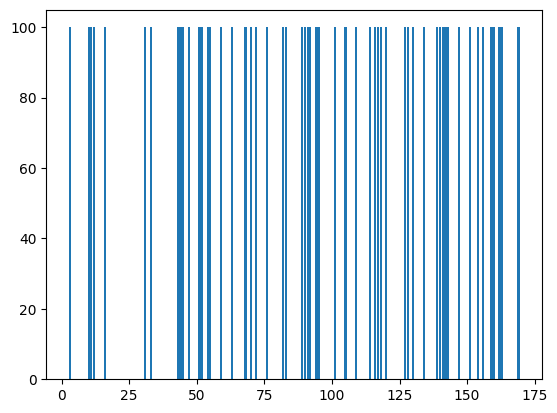

5500

In [5]:
import matplotlib.pyplot as plt

id_counts = bsmp['PROSODY_ID'].value_counts()
id_counts_sorted = id_counts.sort_index()

plt.bar(id_counts_sorted.index, id_counts_sorted)
plt.show()
records = len(bsmp)
records

## Splitting data to train,validation,test

In [6]:
verse1 = list(bsmp["VERSE1"])
verse2 = list(bsmp["VERSE2"])
verse = verse1 + verse2
prosody = list(bsmp["PROSODY"]) + list(bsmp["PROSODY"])
len(verse),len(prosody)

(11000, 11000)

In [7]:
all_data=[]
for i in range(len(verse)):
  all_data.append((verse[i],prosody[i]))

In [8]:
len(all_data),all_data[500]

(11000, ('وقت فرخنده درختی است، هنر میوه', 'فعلاتن فعلاتن فعلاتن فع'))

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
train_iter,test_iter=train_test_split(all_data,test_size=0.2,random_state=42,shuffle=True)

In [11]:
len(train_iter),len(test_iter)

(8800, 2200)

# Tokenizer:
Since both verses and prosody have no space character we just list the string for tokenizer

In [12]:
def my_tokenizer(word: str):
    return word.split(" ")

# Building vocab and token transform

In [13]:
from torchtext.vocab import build_vocab_from_iterator
from typing import Iterable, List

token_transform = {}
vocab_transform = {}

SRC_LANGUAGE = 'verse'
TGT_LANGUAGE = 'prosody'

token_transform[SRC_LANGUAGE] = my_tokenizer
token_transform[TGT_LANGUAGE] = my_tokenizer

# yield token for build_vocab_from_iterator function
def yield_tokens(data_iter: Iterable, language: str) -> List[str]:
    language_index = {SRC_LANGUAGE: 0, TGT_LANGUAGE: 1}

    for data_sample in data_iter:
        yield token_transform[language](data_sample[language_index[language]])

#special symbols and indices
UNK_IDX, PAD_IDX, BOS_IDX, EOS_IDX = 0, 1, 2, 3
special_symbols = ['<unk>', '<pad>', '<bos>', '<eos>']

for ln in [SRC_LANGUAGE, TGT_LANGUAGE]:
    # Training data Iterator
    all_iter=all_data
    # Create torchtext's Vocab object
    vocab_transform[ln] = build_vocab_from_iterator(yield_tokens(all_data, ln),
                                                    min_freq=1,
                                                    specials=special_symbols,
                                                    special_first=True)

# Creating Transformer Model

In [14]:
from torch import Tensor
import torch
import torch.nn as nn
from torch.nn import Transformer
import math
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
DEVICE

device(type='cuda')

## PositionalEncoding

In [15]:
# helper Module that adds positional encoding to the token embedding to introduce a notion of word order.
class PositionalEncoding(nn.Module):
    def __init__(self,
                 emb_size: int,
                 dropout: float,
                 maxlen: int = 5000):
        super(PositionalEncoding, self).__init__()
        den = torch.exp(- torch.arange(0, emb_size, 2)* math.log(10000) / emb_size)
        pos = torch.arange(0, maxlen).reshape(maxlen, 1)
        pos_embedding = torch.zeros((maxlen, emb_size))
        pos_embedding[:, 0::2] = torch.sin(pos * den)
        pos_embedding[:, 1::2] = torch.cos(pos * den)
        pos_embedding = pos_embedding.unsqueeze(-2)

        self.dropout = nn.Dropout(dropout)
        self.register_buffer('pos_embedding', pos_embedding)

    def forward(self, token_embedding: Tensor):
        return self.dropout(token_embedding + self.pos_embedding[:token_embedding.size(0), :])


## TokenEmbedding

In [16]:
# helper Module to convert tensor of input indices into corresponding tensor of token embeddings
class TokenEmbedding(nn.Module):
    def __init__(self, vocab_size: int, emb_size):
        super(TokenEmbedding, self).__init__()
        self.embedding = nn.Embedding(vocab_size, emb_size)
        self.emb_size = emb_size

    def forward(self, tokens: Tensor):
        return self.embedding(tokens.long()) * math.sqrt(self.emb_size)


## Seq2Seq Transformer model

In [17]:
# Seq2Seq Network
class Seq2SeqTransformer(nn.Module):
    def __init__(self,
                 num_encoder_layers: int,
                 num_decoder_layers: int,
                 emb_size: int,
                 nhead: int,
                 src_vocab_size: int,
                 tgt_vocab_size: int,
                 dim_feedforward: int = 512,
                 dropout: float = 0.1):
        super(Seq2SeqTransformer, self).__init__()
        self.transformer = Transformer(d_model=emb_size,
                                       nhead=nhead,
                                       num_encoder_layers=num_encoder_layers,
                                       num_decoder_layers=num_decoder_layers,
                                       dim_feedforward=dim_feedforward,
                                       dropout=dropout)
        self.generator = nn.Linear(emb_size, tgt_vocab_size)
        self.src_tok_emb = TokenEmbedding(src_vocab_size, emb_size)
        self.tgt_tok_emb = TokenEmbedding(tgt_vocab_size, emb_size)
        self.positional_encoding = PositionalEncoding(
            emb_size, dropout=dropout)

    def forward(self,
                src: Tensor,
                trg: Tensor,
                src_mask: Tensor,
                tgt_mask: Tensor,
                src_padding_mask: Tensor,
                tgt_padding_mask: Tensor,
                memory_key_padding_mask: Tensor):
        src_emb = self.positional_encoding(self.src_tok_emb(src))
        tgt_emb = self.positional_encoding(self.tgt_tok_emb(trg))
        outs = self.transformer(src_emb, tgt_emb, src_mask, tgt_mask, None,
                                src_padding_mask, tgt_padding_mask, memory_key_padding_mask)
        return self.generator(outs)

    def encode(self, src: Tensor, src_mask: Tensor):
        return self.transformer.encoder(self.positional_encoding(
                            self.src_tok_emb(src)), src_mask)

    def decode(self, tgt: Tensor, memory: Tensor, tgt_mask: Tensor):
        return self.transformer.decoder(self.positional_encoding(
                          self.tgt_tok_emb(tgt)), memory,
                          tgt_mask)

# Masking mechanism
During training, we need a subsequent character mask that will prevent model to look into the future characters when making predictions. We will also need masks to hide source and target padding tokens. Below, let’s define a function that will take care of both.

Reference : https://pytorch.org/tutorials/beginner/translation_transformer.html

In [18]:
def generate_square_subsequent_mask(sz):
    mask = (torch.triu(torch.ones((sz, sz), device=DEVICE)) == 1).transpose(0, 1)
    mask = mask.float().masked_fill(mask == 0, float('-inf')).masked_fill(mask == 1, float(0.0))
    return mask


def create_mask(src, tgt):
    src_seq_len = src.shape[0]
    tgt_seq_len = tgt.shape[0]

    tgt_mask = generate_square_subsequent_mask(tgt_seq_len)
    src_mask = torch.zeros((src_seq_len, src_seq_len),device=DEVICE).type(torch.bool)

    src_padding_mask = (src == PAD_IDX).transpose(0, 1)
    tgt_padding_mask = (tgt == PAD_IDX).transpose(0, 1)
    return src_mask, tgt_mask, src_padding_mask, tgt_padding_mask

# Building Model

In [19]:
torch.manual_seed(42)

# Hyperparameters
SRC_VOCAB_SIZE = len(vocab_transform[SRC_LANGUAGE])
TGT_VOCAB_SIZE = len(vocab_transform[TGT_LANGUAGE])
EMB_SIZE = 512
NHEAD = 8
FFN_HID_DIM = 512
BATCH_SIZE = 128
NUM_ENCODER_LAYERS = 5
NUM_DECODER_LAYERS = 5

weight_decay = float(0)
lr = 1e-5

# Instantiating Model
s2s_model = Seq2SeqTransformer(NUM_ENCODER_LAYERS, NUM_DECODER_LAYERS, EMB_SIZE,
                                 NHEAD, SRC_VOCAB_SIZE, TGT_VOCAB_SIZE, FFN_HID_DIM)

# weights and biases initialization
for p in s2s_model.parameters():
    if p.dim() > 1:
        nn.init.xavier_uniform_(p)

s2s_model = s2s_model.to(DEVICE)

# CrossEntropy Loss function
loss_fn = torch.nn.CrossEntropyLoss(ignore_index=PAD_IDX)

# AdamW optimizer
optimizer = torch.optim.AdamW(s2s_model.parameters(), lr=lr, betas=(0.9, 0.98), eps=1e-9)

C:\Users\Turbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\modules\transformer.py:286: UserWarning: enable_nested_tensor is True, but self.use_nested_tensor is False because encoder_layer.self_attn.batch_first was not True(use batch_first for better inference performance)
  warnings.warn(f"enable_nested_tensor is True, but self.use_nested_tensor is False because {why_not_sparsity_fast_path}")


# Collation
our data iterator yields a pair of raw strings. We need to convert these string pairs into the batched tensors that can be processed by our Seq2Seq network defined previously. Below we define our collate function that convert batch of raw strings into batch tensors that can be fed directly into our model.

Reference : https://pytorch.org/tutorials/beginner/translation_transformer.html

In [20]:
from torch.nn.utils.rnn import pad_sequence

# helper function to club together sequential operations
def sequential_transforms(*transforms):
    def func(txt_input):
        for transform in transforms:
            txt_input = transform(txt_input)
        return txt_input
    return func

# function to add BOS/EOS and create tensor for input sequence indices
def tensor_transform(token_ids: List[int]):
    return torch.cat((torch.tensor([BOS_IDX]),
                      torch.tensor(token_ids),
                      torch.tensor([EOS_IDX])))

# src and tgt language text transforms to convert raw strings into tensors indices
text_transform = {}
for ln in [SRC_LANGUAGE, TGT_LANGUAGE]:
    text_transform[ln] = sequential_transforms(token_transform[ln], #Tokenization
                                               vocab_transform[ln], #Numericalization
                                               tensor_transform) # Add BOS/EOS and create tensor


# function to collate data samples into batch tesors
def collate_fn(batch):
    src_batch, tgt_batch = [], []
    for src_sample, tgt_sample in batch:
        src_batch.append(text_transform[SRC_LANGUAGE](src_sample.rstrip("\n")))
        tgt_batch.append(text_transform[TGT_LANGUAGE](tgt_sample.rstrip("\n")))

    src_batch = pad_sequence(src_batch, padding_value=PAD_IDX)
    tgt_batch = pad_sequence(tgt_batch, padding_value=PAD_IDX)
    return src_batch, tgt_batch

# Training

In [21]:
from torch.utils.data import DataLoader

## Training function

In [22]:

def train_function(model, optimizer):
    model.train()
    losses = 0
    train_dataloader = DataLoader(train_iter, batch_size=BATCH_SIZE, collate_fn=collate_fn)

    for src, tgt in train_dataloader:
        src = src.to(DEVICE)
        tgt = tgt.to(DEVICE)

        tgt_input = tgt[:-1, :]

        src_mask, tgt_mask, src_padding_mask, tgt_padding_mask = create_mask(src, tgt_input)

        logits = model(src, tgt_input, src_mask, tgt_mask,src_padding_mask, tgt_padding_mask, src_padding_mask)

        optimizer.zero_grad()

        tgt_out = tgt[1:, :]
        loss = loss_fn(logits.reshape(-1, logits.shape[-1]), tgt_out.reshape(-1))
        loss.backward()

        optimizer.step()

        losses += loss.item()

    return losses / len(train_dataloader)

## Evaluating function

In [23]:
def evaluate_function(model):
    model.eval()
    losses = 0

    val_iter=test_iter
    val_dataloader = DataLoader(val_iter, batch_size=BATCH_SIZE, collate_fn=collate_fn)

    for src, tgt in val_dataloader:
        src = src.to(DEVICE)
        tgt = tgt.to(DEVICE)

        tgt_input = tgt[:-1, :]

        src_mask, tgt_mask, src_padding_mask, tgt_padding_mask = create_mask(src, tgt_input)

        logits = model(src, tgt_input, src_mask, tgt_mask,src_padding_mask, tgt_padding_mask, src_padding_mask)

        tgt_out = tgt[1:, :]
        loss = loss_fn(logits.reshape(-1, logits.shape[-1]), tgt_out.reshape(-1))
        losses += loss.item()

    return losses / len(val_dataloader)

## Train model for N epochs

In [24]:
from timeit import default_timer as timer
epoch_times = []
NUM_EPOCHS = 20

stats_for_plotting={"train_losses":[],"test_losses":[]}
for epoch in range(NUM_EPOCHS):
    start_time = timer()
    train_loss = train_function(s2s_model, optimizer)
    end_time = timer()
    val_loss = evaluate_function(s2s_model)
    et = end_time - start_time
    epoch_times.append(et)
    print((f"Epoch: {epoch}, Train loss: {train_loss:.3f}, Val loss: {val_loss:.3f}, "f"Epoch time = {et:.3f}s"))
    stats_for_plotting["train_losses"].append(train_loss)
    stats_for_plotting["test_losses"].append(val_loss)
torch.save(s2s_model.state_dict(), f"s2s-{records}-{NUM_EPOCHS}e.pth")

C:\Users\Turbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\functional.py:5476: UserWarning: 1Torch was not compiled with flash attention. (Triggered internally at ..\aten\src\ATen\native\transformers\cuda\sdp_utils.cpp:263.)
  attn_output = scaled_dot_product_attention(q, k, v, attn_mask, dropout_p, is_causal)
C:\Users\Turbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\nn\functional.py:5109: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


Epoch: 0, Train loss: 2.632, Val loss: 1.634, Epoch time = 3.933s
Epoch: 1, Train loss: 1.772, Val loss: 1.216, Epoch time = 2.487s
Epoch: 2, Train loss: 1.434, Val loss: 1.018, Epoch time = 2.574s
Epoch: 3, Train loss: 1.255, Val loss: 0.913, Epoch time = 2.474s
Epoch: 4, Train loss: 1.148, Val loss: 0.864, Epoch time = 2.385s
Epoch: 5, Train loss: 1.081, Val loss: 0.835, Epoch time = 2.520s
Epoch: 6, Train loss: 1.033, Val loss: 0.809, Epoch time = 2.389s
Epoch: 7, Train loss: 0.990, Val loss: 0.790, Epoch time = 2.393s
Epoch: 8, Train loss: 0.953, Val loss: 0.777, Epoch time = 2.387s
Epoch: 9, Train loss: 0.930, Val loss: 0.766, Epoch time = 2.372s
Epoch: 10, Train loss: 0.907, Val loss: 0.758, Epoch time = 2.391s
Epoch: 11, Train loss: 0.890, Val loss: 0.746, Epoch time = 2.409s
Epoch: 12, Train loss: 0.874, Val loss: 0.737, Epoch time = 2.419s
Epoch: 13, Train loss: 0.861, Val loss: 0.730, Epoch time = 2.415s
Epoch: 14, Train loss: 0.837, Val loss: 0.731, Epoch time = 2.414s
Epoch

## Plotting stats

In [25]:
from matplotlib import pyplot as plt

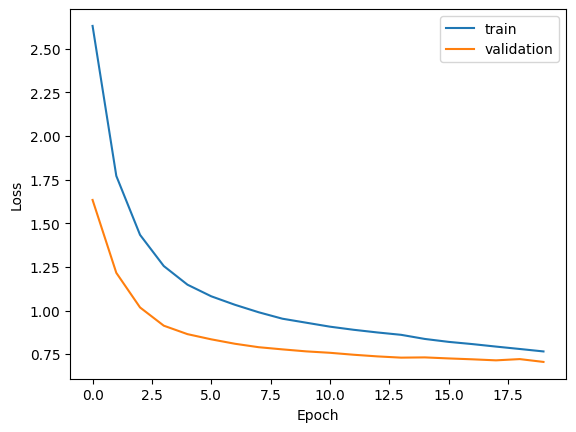

In [26]:
plt.plot(stats_for_plotting["train_losses"],label="train")
plt.plot(stats_for_plotting["test_losses"],label="validation")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.show()

In [27]:
!pip install jiwer

# Inference

## decoder function
it is called greedy decoder because we don't do any beam search for results

In [28]:
# function to generate output sequence
def greedy_decode(model, src, src_mask, max_len, start_symbol):
    src = src.to(DEVICE)
    src_mask = src_mask.to(DEVICE)

    memory = model.encode(src, src_mask)
    ys = torch.ones(1, 1).fill_(start_symbol).type(torch.long).to(DEVICE)
    for i in range(max_len-1):
        memory = memory.to(DEVICE)
        tgt_mask = (generate_square_subsequent_mask(ys.size(0))
                    .type(torch.bool)).to(DEVICE)
        out = model.decode(ys, memory, tgt_mask)
        out = out.transpose(0, 1)
        prob = model.generator(out[:, -1])
        _, next_word = torch.max(prob, dim=1)
        next_word = next_word.item()

        ys = torch.cat([ys,
                        torch.ones(1, 1).type_as(src.data).fill_(next_word)], dim=0)
        if next_word == EOS_IDX:
            break
    return ys


## Inference function
gives a grapheme and outputs the phoneme

In [29]:
def inference(model: torch.nn.Module, src_sentence: str):
    model.eval()
    src = text_transform[SRC_LANGUAGE](src_sentence).view(-1, 1)
    num_tokens = src.shape[0]
    src_mask = (torch.zeros(num_tokens, num_tokens)).type(torch.bool)
    tgt_tokens = greedy_decode(
        model,  src, src_mask, max_len=num_tokens + 5, start_symbol=BOS_IDX).flatten()
    return " ".join(vocab_transform[TGT_LANGUAGE].lookup_tokens(list(tgt_tokens.cpu().numpy()))).replace("<bos>", "").replace("<eos>", "")

# Evaluating model last checkpoint

## 1.Saving all predictions

In [30]:
from tqdm import tqdm
all_preds=[]
for gs,ps in tqdm(test_iter):
  ground_truth=ps
  myoutput=inference(s2s_model,gs)
  all_preds.append(myoutput.replace(" ",""))

100%|██████████████████████████████████████████████████████████████████████████████| 2200/2200 [01:02<00:00, 35.23it/s]


## 2.Calculating WER and PER
WER : Word error rate

PER : Phoneme error rate

In [31]:
from jiwer import cer,wer

In [32]:
trues=0
all_num=0
average_cer=0
average_wer=0
for i in range(len(all_preds)):
  if all_preds[i]==test_iter[i][1].replace(" ",""):
    trues+=1
  all_num+=1
  average_cer+=cer(test_iter[i][1].replace(" ",""),all_preds[i])
  average_wer+=wer(test_iter[i][1].replace(" ",""),all_preds[i])
average_cer/=len(all_preds)
average_wer/=len(all_preds)
exact_accuracy=trues/all_num
print(f"Exact Accuracy : {exact_accuracy}")
print(f"PER : {average_cer}")
print(f"WER : {average_wer}")

Exact Accuracy : 0.06727272727272728
PER : 0.4305881528381391
WER : 0.9327272727272727


In [33]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score

true_labels = [data[1].replace(" ","") for data in test_iter]

# Calculate confusion matrix
cm = confusion_matrix(true_labels, all_preds)

# Calculate precision, recall, and f1-score
precision = precision_score(true_labels, all_preds, average='weighted')
recall = recall_score(true_labels, all_preds, average='weighted')
f1 = f1_score(true_labels, all_preds, average='weighted')

# Print the results
print((f"Epoch: {epoch}, Train loss: {train_loss:.3f}, Val loss: {val_loss:.3f}, "f"Epoch time = {(end_time - start_time):.3f}s"))
print(f'train time = {sum(epoch_times)}')
print(f"Accuracy : {exact_accuracy}")
print(f"PER : {average_cer}")
print(f"WER : {average_wer}")
print(f"F1 score : {f1}")
print(f"Precision : {precision}")
print(f"Recall : {recall}")
print("Confusion Matrix :")
print(cm)

Epoch: 19, Train loss: 0.765, Val loss: 0.705, Epoch time = 2.433s
train time = 50.04574190004496
Accuracy : 0.06727272727272728
PER : 0.4305881528381391
WER : 0.9327272727272727
F1 score : 0.03350914223797505
Precision : 0.03966696890857715
Recall : 0.06727272727272728
Confusion Matrix :
[[0 0 0 ... 2 0 0]
 [0 0 0 ... 4 0 0]
 [0 0 7 ... 2 0 0]
 ...
 [0 0 1 ... 8 0 0]
 [0 0 0 ... 7 1 0]
 [0 0 0 ... 3 0 0]]


C:\Users\Turbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Turbo\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Some examples:




In [34]:
some_example_df=pd.DataFrame(columns=['Verse','Predicted Prosody','Correct Prosody'])

In [35]:
import random
some_examples=random.sample(test_iter, 20)
example_gs=[]
example_gt_prosody=[]
example_pred_prosody=[]
for example in some_examples:
  example_gs.append(example[0])
  example_gt_prosody.append(example[1])
  example_pred_prosody.append(inference(s2s_model,example[0]))
some_example_df["Verse"]=example_gs
some_example_df["Predicted Prosody"]=example_pred_prosody
some_example_df["Correct Prosody"]=example_gt_prosody
some_example_df

,Verse,Predicted Prosody,Correct Prosody
0,در وادی صائم و صلی زد,مفعول فاعلات مفاعیلن,مستفعلتن مستفعلتن
1,همچو طنبور و رشته ی طنبور,مفعول فاعلات مفاعیلن,فعلاتن مفاعلن فعلن
2,می کند چشم تو تا بیخود ز ساغر گشته است,مفتعلن مفتعلن مفتعلن مفتعلن,مفتعلن مفتعلن فع مفتعلن مفتعلن فع
3,چون تیغ درین معرکه ماییم و زبانی,مفعول فاعلات مفاعیل فاعلاتن,مفعول مفاعیل مفاعیل فعولن
4,آتشی دارد دل سنگ از محبت در نهاد,فاعلاتن فاعلاتن فاعلاتن فاعلاتن,فعلاتن فعلاتن فعلاتن فعلاتن
5,بر جسم پردلان جوشن‌کنی قبا,مفعول فاعلات مفاعیلن,مفعول فاعلن مفعول فاعلن
6,کوری دیده خفاشان را,مفعول فاعلات مفاعیلن,فعلاتن فعلاتن فعلن
7,زاهد صومعه را گو بیکی ساغر,مفعول فاعلات مفاعیلن,فعلاتن فعلاتن فعلاتن فع
8,باد ببر پیروزی و شاهی قرارت,مفعول فاعلات مفاعیلن,فاعلاتن فاعلاتن فاعلاتن
9,نیلی ز سیلی رخ یتیمان,مفعول مفاعیل مفاعیل فعل,مفاعلن فع مفاعلن فع


## Custom Verse

In [36]:
inference(s2s_model,"سلام")

' مستفعلن مستفعلن مستفعلن مستفعلن فع '